<a href="https://colab.research.google.com/github/user960507/DeepMachineLearning/blob/master/trx_Coin_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL THESE PACKAGES IF NEEDED

In [3]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=0496c2f1188bab707b72a7c9d799d0823fc2d30e0bcd936dafd75c20d5069a3b
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from yahoofinancials import YahooFinancials

#CREATING THE DATAFRAME TO STORE DATA


In [47]:
df = yf.download('TRX-USD', 
                      start='2021-01-01', 
                      end='2023-05-20', 
                      progress=False)
df.head(2)
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-18,0.071058,0.071341,0.069950,0.070276,0.070276,188382376
2023-05-19,0.070273,0.070778,0.070142,0.070675,0.070675,138133276


In [31]:
series = df['Close'].values.reshape(-1, 1)

In [32]:
scaler = StandardScaler()
scaler.fit(series[0:len(series) // 2])
series = scaler.transform(series).flatten()

# Plot it

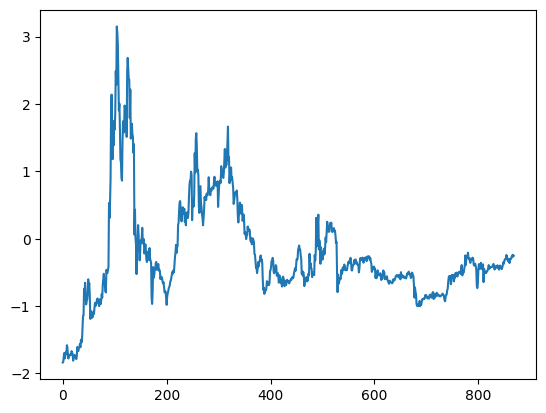

In [33]:
plt.plot(series)
plt.show()

In [35]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (859, 10) Y.shape (859,)


In [36]:
class BaselineModel:
  def predict(self, X):
    return X[:,-1]

In [37]:
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

In [38]:
model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [39]:
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [40]:
print("baseline train mae:", mae(Ytrain2, Ptrain2))
print("baseline test mae:", mae(Ytest2, Ptest2))

baseline train mae: 0.003366797146472064
baseline test mae: 0.0013765768949375596


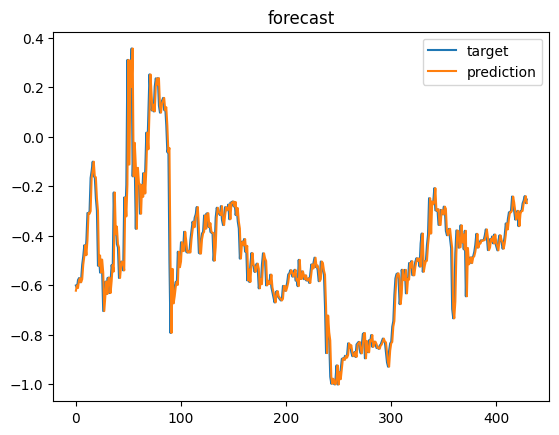

In [44]:
forecast = []
count = 0


while len(forecast) < len(Ytest):
  input_ = Xtest[count]
  f = model.predict(input_.reshape(1, T))[0]
  forecast.append(f)
  count = count + 1

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("forecast")
plt.show()